# MTH5 observations during Aug 21, 2017 total solar eclipse
The total solar eclipse was visible spanning across the USA. Eclipse period UTC time: Aug 21 at 15:46:51 - Aug 21 at 21:04:22

![Image from NASA](https://eclipse.gsfc.nasa.gov/SEmono/TSE2017/TSE2017fig/TSE2017-1.gif)

Several stations from **4P** network were available, however they were located not on the path of totality.
!(https://ds.iris.edu/gmap/#network=*&station=*&location=--&channel=?FE,?FN,?FZ&starttime=2017-08-21&endtime=2017-08-21&planet=earth)  



# MTH5 data near North Dakota
The following stations were located in North Dakota and Minnesota states.

In [40]:
import pyspedas, pytplot
import numpy as np
from pyspedas.mth5.load_fdsn import load_fdsn

date_start = '2017-08-21T15:46:51'
date_end = '2017-08-21T21:04:22'
stations = ['NDC27', 'NDB28', 'NDD30', 'NDE31', 'NDB31', 'MNC32', 'MNB32']
fdsn_vars = []
for sta in stations:
   load_fdsn(network="4P", station=sta, trange=[date_start, date_end], 
             nodownload=True, noexception=True, nowarnings=True)   
   fdsn_vars.append(f"fdsn_4P_{sta}")  # Combine names of the tplot variables

2024-07-11T19:43:25.651543-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_NDC27_20170821T154651_20170821T210422.h5
2024-07-11T19:43:27.053656-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_NDB28_20170821T154651_20170821T210422.h5
2024-07-11T19:43:28.468098-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_NDD30_20170821T154651_20170821T210422.h5
2024-07-11T19:43:29.866841-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_NDE31_20170821T154651_20170821T210422.h5
2024-07-11T19:43:31.289518-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_NDB31_20170821T154651_20170821T210422.h5
2024-07-11T19:43:32.699666-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_MNC32_20170821T154651_20170821T210422.h5
2024-07-11T19:43:34.332298-0700 | INFO | mth5.mth5 | close_mth5 

The stations are organized based on longitude from West to East, along the solar eclipse movement.

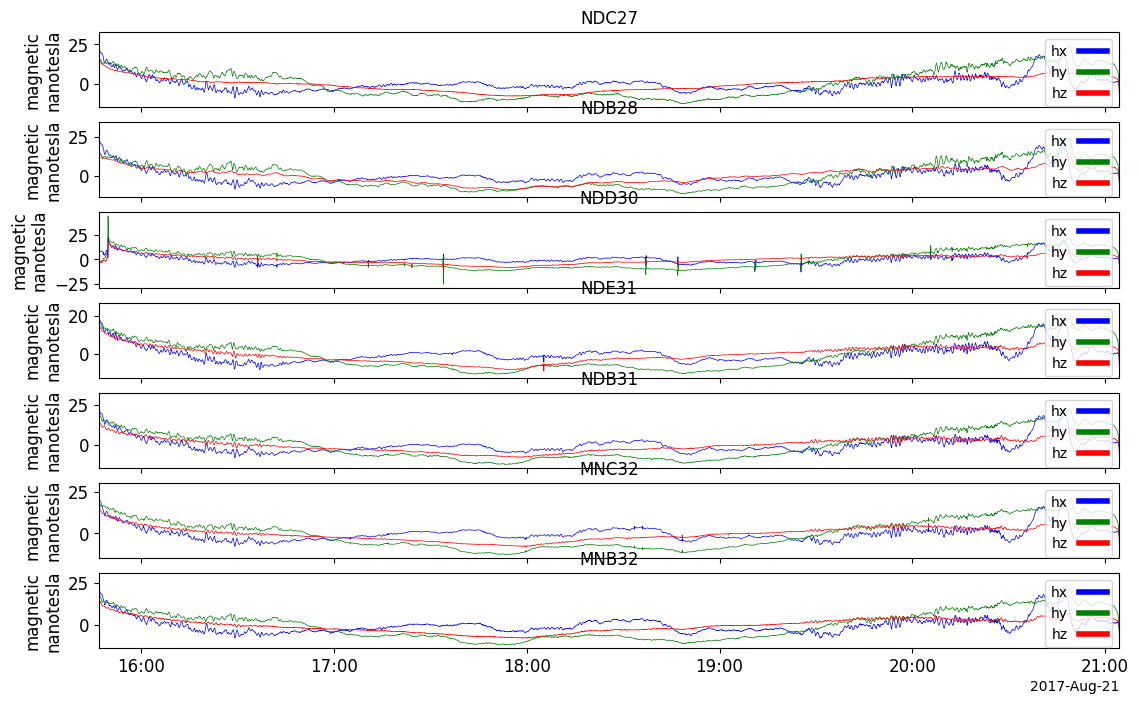

In [41]:
for sta in stations:   
   pytplot.options(f"fdsn_4P_{sta}", 'name', sta)
   
pytplot.tplot_options('vertical_spacing', 0.2)
pytplot.xlim(date_start, date_end)
pytplot.tplot(fdsn_vars)

The solar eclipse maxed in the region between 16:32 and 16:40pm UTC, according this interactive map !(https://www.timeanddate.com/eclipse/map/2017-august-21).

A noticeable phase shift is visible between the stations' x-components.

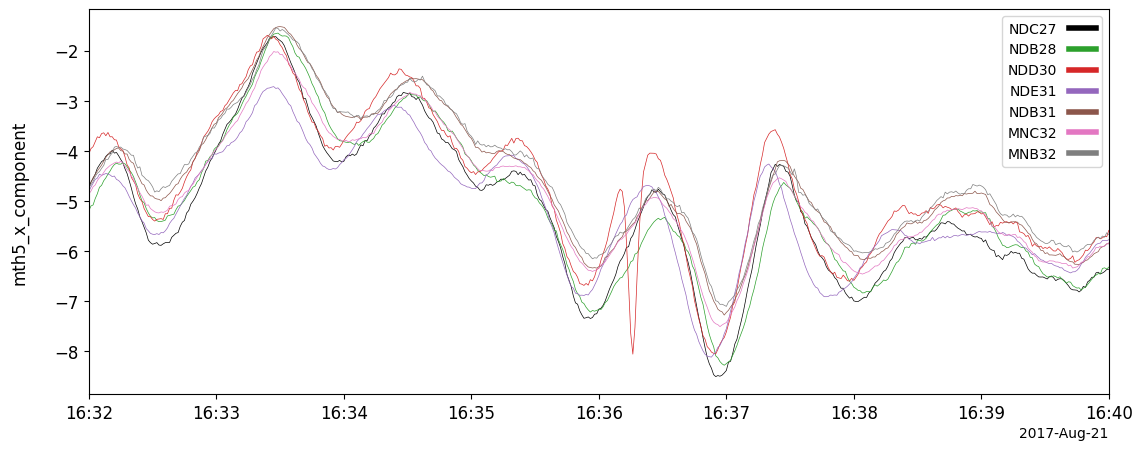

In [42]:
data_list = []
for var in fdsn_vars:
   time, data = pytplot.get_data(var)  # Unpack tplot variable
   data_list.append(data[:, 0])
combined_data = np.array(data_list).T

pytplot.store_data('mth5_x_component', {'x': time, 'y': combined_data})
pytplot.options('mth5_x_component', 'legend_names', stations)
pytplot.xlim('2017-08-21T16:32:00', '2017-08-21T16:40:00')
pytplot.tplot('mth5_x_component')

# MTH5 data near Montereal
Several stations were located in the northern part of New York, Vermont, and Maine, with Montreal as the nearest large city. 

In [43]:
stations = ['NYH55', 'VTD58', 'MEB61', 'REC62', 'MEA63']
fdsn_vars = []
for sta in stations:
   load_fdsn(network="4P", station=sta, trange=[date_start, date_end], 
             nodownload=True, noexception=True, nowarnings=True)   
   fdsn_vars.append(f"fdsn_4P_{sta}")  # Combine names of the tplot variables

2024-07-11T19:43:37.877890-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_NYH55_20170821T154651_20170821T210422.h5
2024-07-11T19:43:39.479889-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_VTD58_20170821T154651_20170821T210422.h5
2024-07-11T19:43:40.891617-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_MEB61_20170821T154651_20170821T210422.h5
2024-07-11T19:43:42.345145-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_REC62_20170821T154651_20170821T210422.h5
2024-07-11T19:43:43.785636-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_MEA63_20170821T154651_20170821T210422.h5


Same as before, the stations were organized by longitude and had much wider spread.

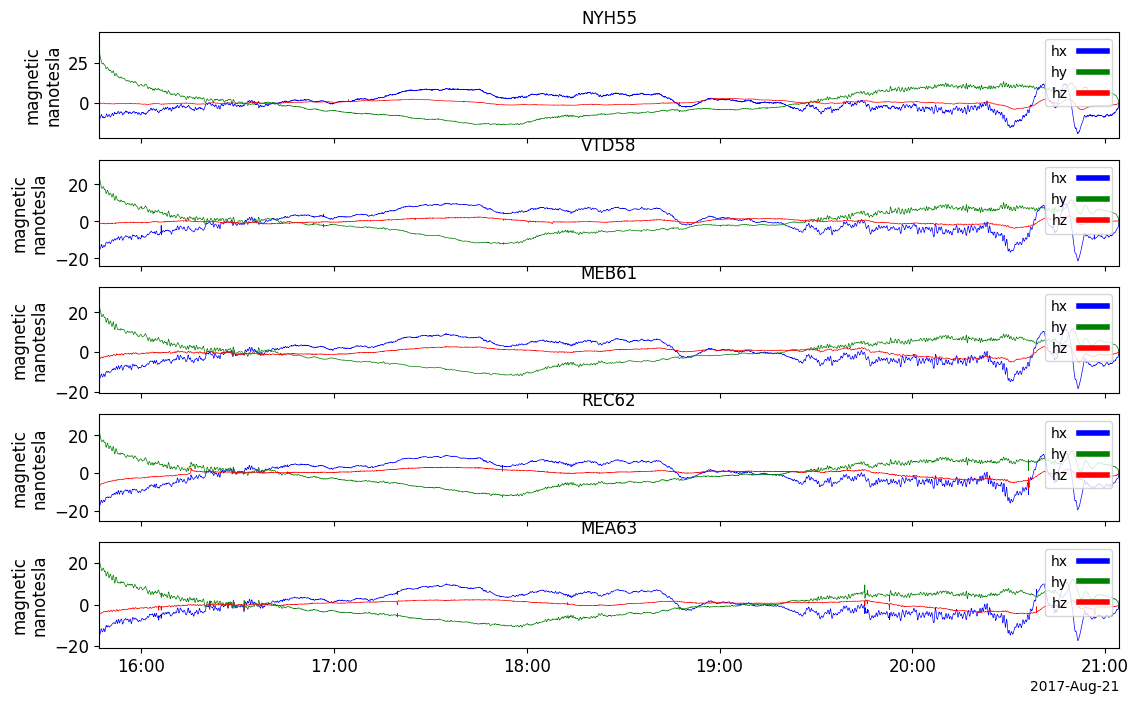

In [44]:
for sta in stations:   
   pytplot.options(f"fdsn_4P_{sta}", 'name', sta)
   
pytplot.tplot_options('vertical_spacing', 0.2)
pytplot.xlim(date_start, date_end)
pytplot.tplot(fdsn_vars)

The solar eclipse maxed in the region between 18:35 and 18:45pm UTC. The phase shift is not prominent in this case.

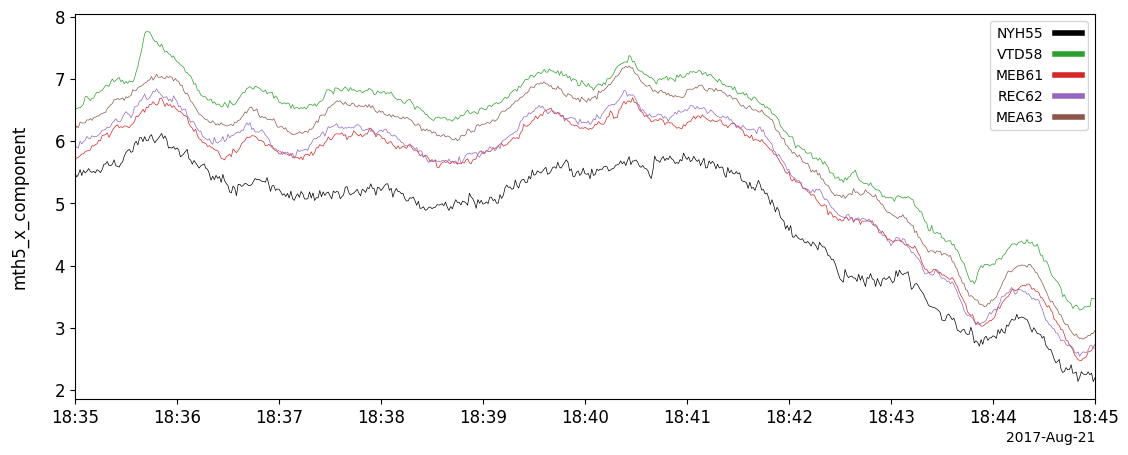

In [45]:
data_list = []
for var in fdsn_vars:
   time, data = pytplot.get_data(var)  # Unpack tplot variable
   data_list.append(data[:, 0])
combined_data = np.array(data_list).T

pytplot.store_data('mth5_x_component', {'x': time, 'y': combined_data})
pytplot.options('mth5_x_component', 'legend_names', stations)
pytplot.xlim('2017-08-21T18:35:00', '2017-08-21T18:45:00')
pytplot.tplot('mth5_x_component')